# Employee Attrition Analysis

# Overview
Attrition, in Human Resource terminology, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to  predict employee attrition and identify influtial factors to reduce employee attrition.


# Data Ingest

In [72]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [73]:
IBM_Attrition = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
IBM_Attrition = IBM_Attrition.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole','Department','JobRole','Education','PercentSalaryHike'], axis=1)
IBM_Attrition.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,2,4,Single,5993,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,2,Married,5130,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,1,3,Single,2090,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,3,4,Female,3,1,3,Married,2909,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,2,1,Male,3,1,2,Married,3468,9,No,3,4,1,3,3,2,2


In [74]:
IBM_Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [75]:
#There is no NaN values in the dataset
print(pd.isnull(IBM_Attrition).sum())

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64


In [76]:
#mapping non-numeric values to numeric values
IBM_Attrition_Nu = IBM_Attrition.copy()
YN_mapping = {"Yes": 1, "No": 0}
IBM_Attrition_Nu['Attrition'] = IBM_Attrition_Nu['Attrition'].map(YN_mapping)
IBM_Attrition_Nu['OverTime'] = IBM_Attrition_Nu['OverTime'].map(YN_mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
IBM_Attrition_Nu['BusinessTravel'] = IBM_Attrition_Nu['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
IBM_Attrition_Nu['Gender'] = IBM_Attrition_Nu['Gender'].map(Gender_mapping)
Marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
IBM_Attrition_Nu['MaritalStatus'] = IBM_Attrition_Nu['MaritalStatus'].map(Marital_mapping)

IBM_Attrition_Nu.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,0,1,2,1,3,2,4,0,5993,8,1,3,1,0,0,1,6,0
1,49,0,1,8,3,0,2,2,2,1,5130,1,0,4,4,1,3,3,10,1
2,37,1,0,2,4,0,2,1,3,0,2090,6,1,3,2,0,3,3,0,0
3,33,0,1,3,4,1,3,1,3,1,2909,1,1,3,3,0,3,3,8,3
4,27,0,0,2,1,0,3,1,2,1,3468,9,0,3,4,1,3,3,2,2


# EDA

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [78]:
Y_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'Yes'])
N_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]



<Axes: title={'center': 'Attrition Heatmap'}>

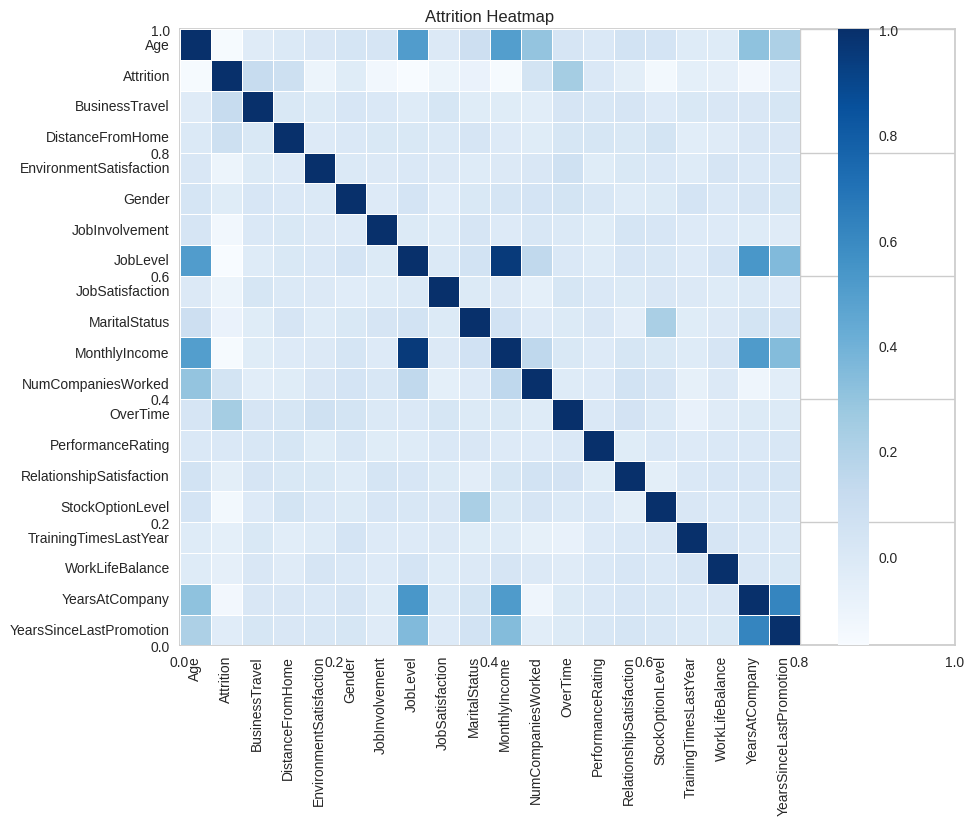

In [79]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = IBM_Attrition_Nu.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

## Objective Factors

In [80]:
Age_YAC_NCW = IBM_Attrition[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

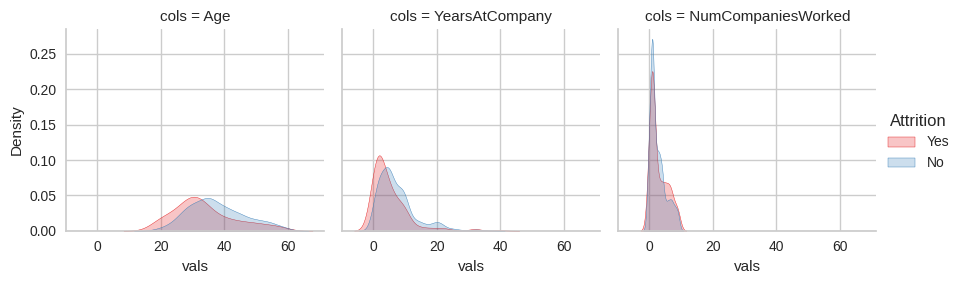

In [81]:
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture..
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

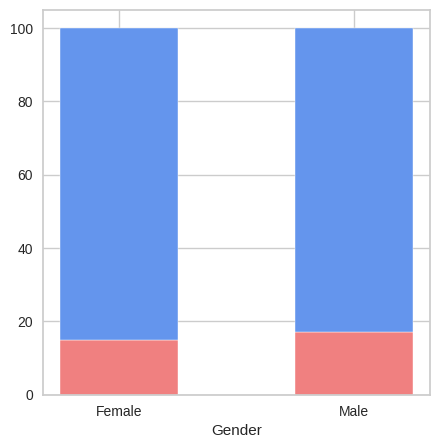

In [82]:
# Data
r = [0,1]
Y_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Female')])
N_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Female')])
Y_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Male')])
N_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")

# Show graphic
plt.show()

## Return and Bonus

In [83]:
Income = IBM_Attrition[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')

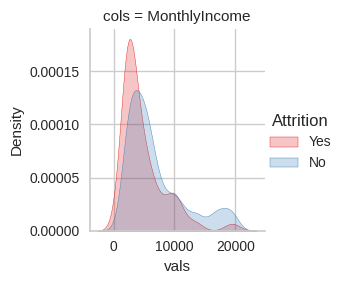

In [84]:
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Employees with low income tend to attrit

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

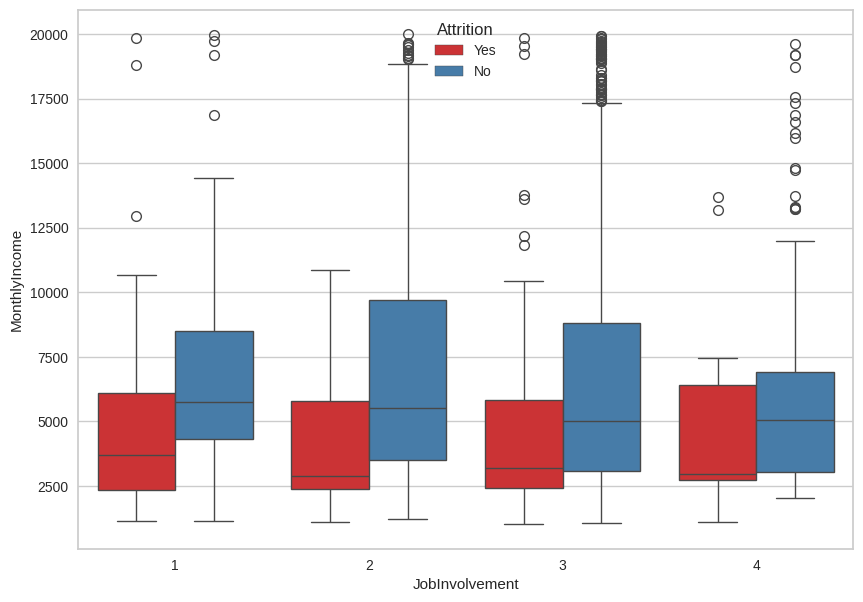

In [85]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=IBM_Attrition, palette="Set1")
##Interesting Finding: Low income together with similar involvement is the reason behind attrition

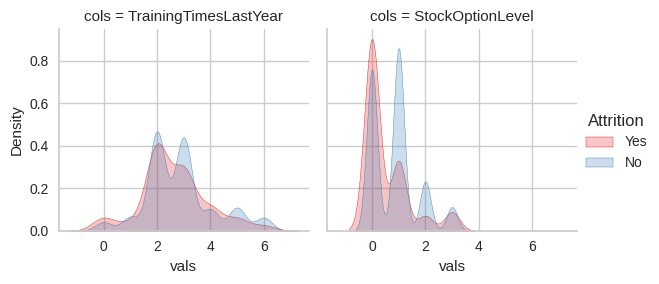

In [86]:
TS = IBM_Attrition[['TrainingTimesLastYear','StockOptionLevel','Attrition']]
#Age_YAC_NCW.head()
TS_melt = TS.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()
g = sns.FacetGrid(TS_melt, col='cols', hue="Attrition", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"fill": True}).add_legend())
#Employee pay attention to stock option -- when given option, work for the company may increase return.

## Satisfaction

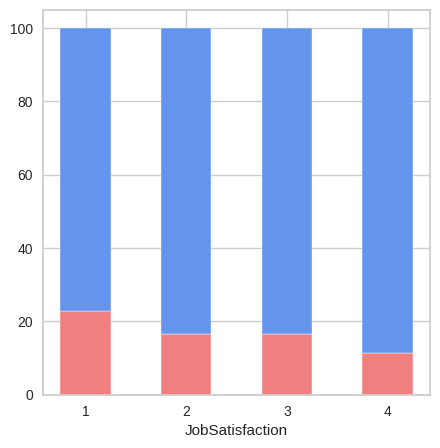

In [87]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")

# Show graphic
plt.show()

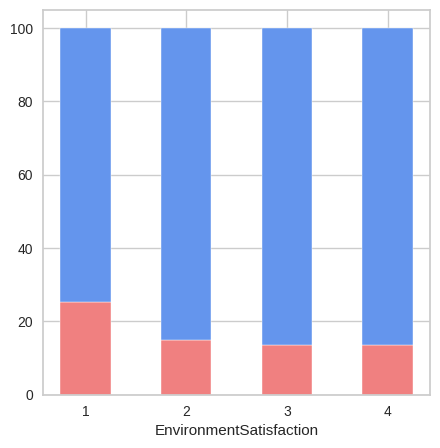

In [88]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")

# Show graphic
plt.show()

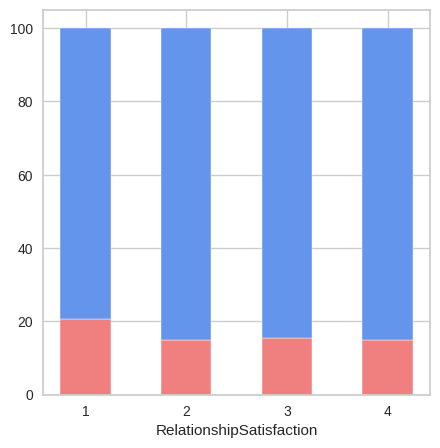

In [89]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("RelationshipSatisfaction")

# Show graphic
plt.show()

# Model

In [90]:
from sklearn.model_selection import train_test_split

predictors = IBM_Attrition_Nu.drop(['Attrition'], axis=1)
target = IBM_Attrition_Nu["Attrition"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

86.11


In [92]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.8


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       271
           1       0.68      0.25      0.36        53

    accuracy                           0.86       324
   macro avg       0.78      0.61      0.64       324
weighted avg       0.84      0.86      0.83       324



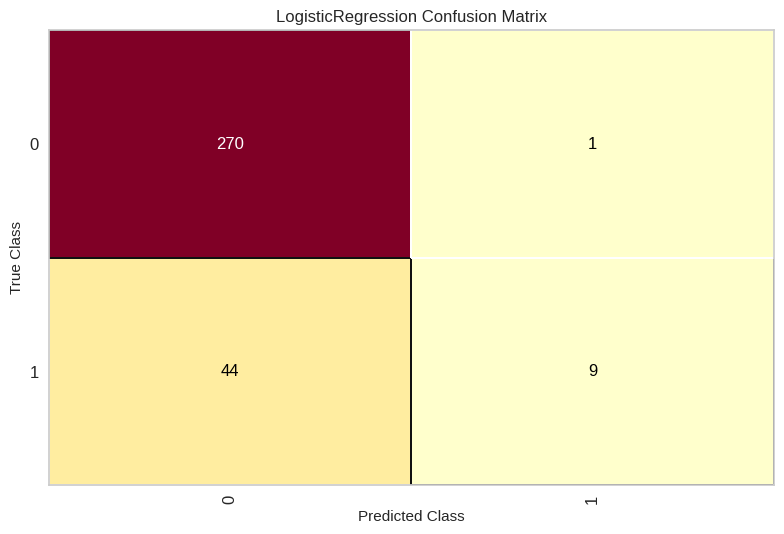

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [94]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(logreg, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_val, y_val)

# How did we do?
cm.poof()

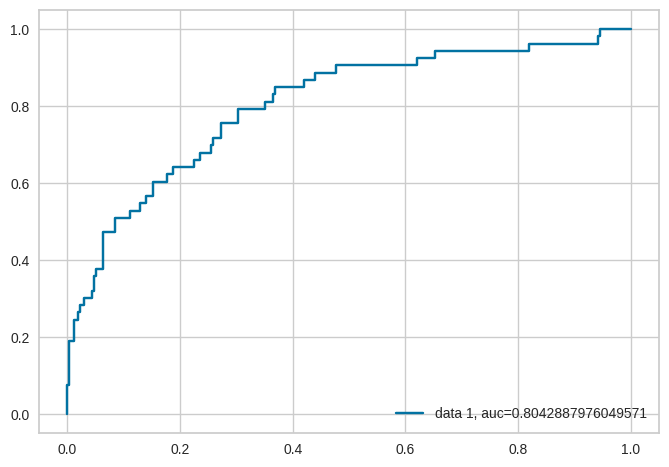

In [95]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
y_pred_proba = logreg.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [96]:
import numpy as np
coef = np.squeeze(abs(logreg.coef_)).tolist()

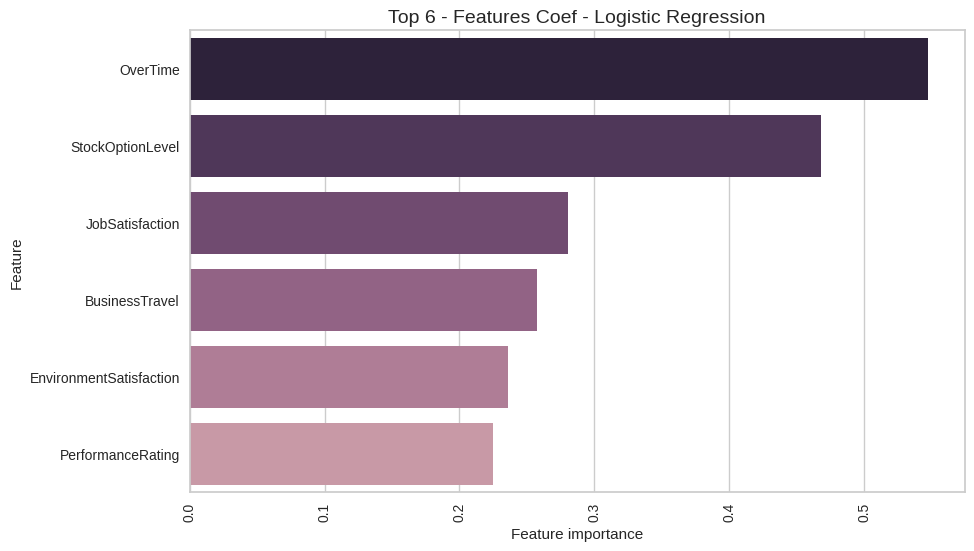

In [97]:
%matplotlib inline

tmp = pd.DataFrame({'Feature': list(x_train), 'Feature importance': coef})
tmp = tmp.sort_values(by='Feature importance',ascending=False).head(6)
plt.figure(figsize = (10,6))
plt.title('Top 6 - Features Coef - Logistic Regression',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h',palette=sns.cubehelix_palette(8,reverse=True))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Conclusion

### **Based on the influential factors analysis **
Don't make them work overtime.

Communicate the vision

Increase employee engagement, especially young employees

Enhance recognition and rewards programs.

Create a pleasant workspace and increase satisfaction

###**Since the model still need improvement in predicting attrition... **

Stay interview...
e.g.
“What kind of feedback or recognition would you like about your performance that you aren’t currently receiving?”

Survey or interview with employees that decided to leave, identify the things employees care.
